In [1]:
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170508288/170498071 [==============================] - 60s 0us/step


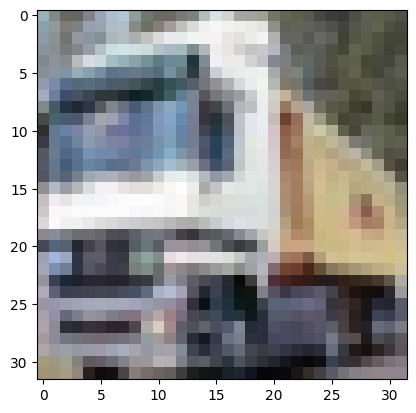

In [19]:
plt.imshow(x_train[1])

In [13]:
print(len(x_train))
print(x_train.shape)

50000
(50000, 32, 32, 3)


In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [14]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
x_train = x_train / 255
x_test = x_test / 255

In [23]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(1200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1200)              3687600   
_________________________________________________________________
dense_8 (Dense)              (None, 100)               120100    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 3,808,710
Trainable params: 3,808,710
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.9387 - accuracy: 0.2934
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7214 - accuracy: 0.3799
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6323 - accuracy: 0.4138
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5707 - accuracy: 0.4373
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5391 - accuracy: 0.4474
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5080 - accuracy: 0.4598
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4801 - accuracy: 0.4717
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4548 - accuracy: 0.4812
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4303 - accuracy: 0.4898
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.409

In [26]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.4352 - accuracy: 0.4961
Loss=1.435
Accuracy=0.496


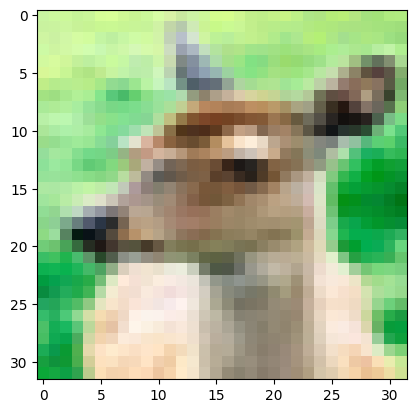

predicted value is: deer


In [28]:
n = 455
plt.imshow(x_test[n])
plt.show()
predicted_values = model.predict(x_test)
print("predicted value is:", classes[np.argmax(predicted_values[n])])